선형 회귀

In [ ]:
k-최근접 인웃의 한계


In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
# 훈련 세트와 테스트 세트로 나누기

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [3]:
# 2차원 배열로 변환하기
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [4]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

In [5]:
# 이 모델을 사용하여 길이가 50cm인 농어 무게 예측하기

knr.predict([[50]])

# 모델이 예측한 농어의 무게는 1,033g 정도이지만 실제 농어의 무게는 훨씬 더 많이 나감.

array([1033.33333333])

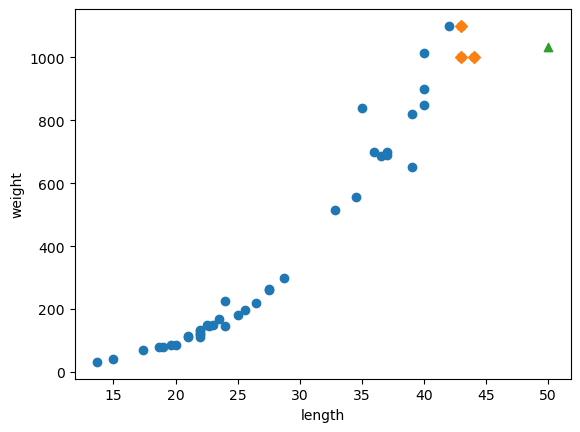

In [8]:
# 훈련세트와 50cm 농어 그리고 이 농어의 최근접 이웃 산점도로 표시하기

distances, indexes = knr.kneighbors([[50]])

import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50,1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [9]:
# 문제점 : 길이가 커질수록 농어 무게 증가 
# >> but 50cm 농어에서 가장 가까운 것은 45cm 근방이기 때문에
# k-최근접 이웃 알고리즘은 이 샘플들의 무게를 평균함

print(np.mean(train_target[indexes]))

# 50cm 농어에 예측했던 값과 일치함.

1033.3333333333333


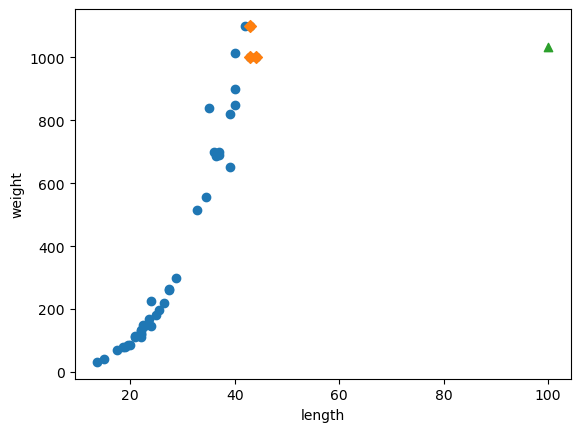

In [13]:
# 길이가 100cm인 농어 이웃 구하기
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes],train_target[indexes], marker='D')
plt.scatter(100,1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 농어가 아무리 커도 무게가 늘어나지 않음

#### 선형 회기(linear regression)

- 대표적인 회기 알고리즘.
- 비교적 간단하고 성능이 뛰어남.
- 특성이 하나인 경우에 어떤 직선을 학습하는 알고리즘.

In [14]:
# sklearn.linear_model 패키지에서 LinearRegression 클래스 사용

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회기 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측
lr.predict([[50]])

array([1241.83860323])

In [15]:
# 직선의 수식은 y = a*X + b 와 같이 표시함.
# LinearRegression class는 데이터와 잘 맞는 a와 b를 찾음.
# a, b는 lr 객체의 codf_ (계수<coefficient>, 가중치<weight>), intercept_ 속성에 저장되어 있음

print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


In [ ]:
# 모델 파라미터 (model parameter) : coef_와 intercept_과 같이 머신러닝 알고리즘이 찾은 값
# 모델 기반 학습 : 최적의 모델 파라미터를 찾는 머신러닝 알고리즘 훈련
# 사례 기반 학습 : k-최근접 이웃처럼 모델 파라미터가 없고 훈련 세트를 저장하는 훈련이 전부인 것

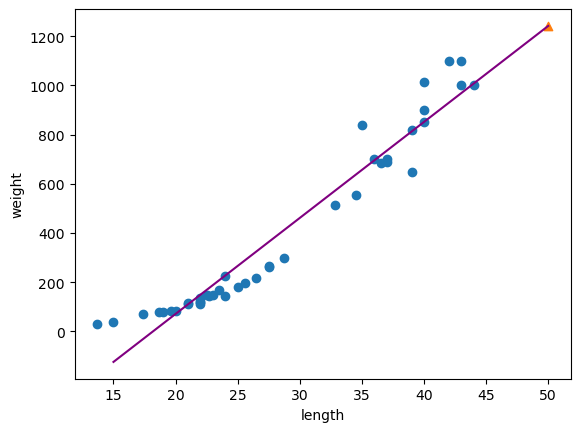

In [17]:
# 훈련 세트 산점도 그리기 linear regression 함수 이용한

plt.scatter(train_input,train_target)

# 15에서 50Rkwl 1차 방정식 그래프 그리기
plt.plot([15,50],[15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_], color='purple')

# 50cm 농어 데이터
plt.scatter(50,1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
# 훈련에서 찾은 최적의 직선

# 훈련 세트와 테스트 세트에 대한 R^2 점수 확인

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.8247503123313559


In [ ]:
# 선형 회기가 만든 직선은 왼쪽 아래로 쭉 뻗어있음 
# >> 그래프대로라면 농어의 무게가 0 아래로 내려갈 텐데 불가능한 일임.
# 
# 농어의 길이와 무게에 대한 산점도를 자세히 보면 일직선이라기보다
# 왼쪽 위로 조금 구부러진 곡선에 가까움.
#  

다항 회귀

In [20]:
# 2차 방정식(곡선)의 그래프는 길이를 제곱한 항이 훈련세트에 추가되어야 함.
# >> 넘파이를 사용하여 간단하게 만들 수 있음

# column_stack() 함수 사용하여 
# >> train_input을 제곱한 것과 train_input 두 배열을 나란히 붙이기 + test_input

train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [21]:
# train_input ** 2식에도 넘파이 브로드캐스팅이 적용됨.
# 즉 train_input에 있는 모든 원소를 제곱함

# 새로 만든 데이터 셋 크기 확인
print(train_poly.shape, test_poly.shape)

# 원래 특성인 길이를 제곱해 왼쪽 열에 추가  >> 열이 2개로 늘어남

(42, 2) (14, 2)


In [23]:
# train_poly를 이용하여 회기 모델 재 훈련

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [24]:
# 선형모델보다 높은 값을 반환해줌

# 이 모델의 계수 및 절편
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


In [ ]:
# 위에서 사용한 방정식을 다항 방정식(polynomial)
# 다항 방정식을 사용한 선형 회기 == polynomial regression

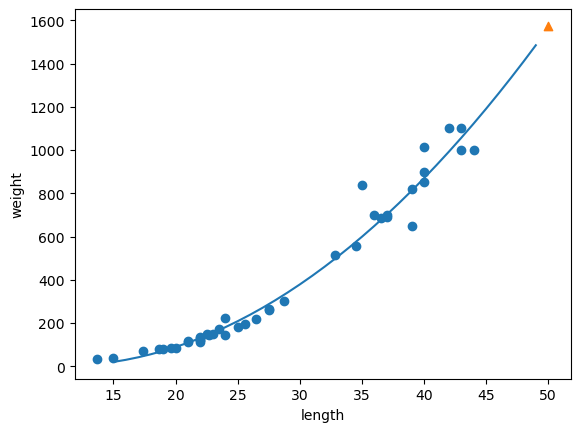

In [29]:
# 위에서 그린 계수와 절편값을 이용해 산점도 그리기

# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열 만들기
point = np.arange(15,50)

# 훈련 세트의 산점도
plt.scatter(train_input,train_target)

# 15에서 49까지 2차 방정식 그래프
plt.plot(point, 1.01*point**2 -21.56*point +116.05)
# plt.plot([15,1.01*15**2 - 21.56*15 + 116.05], [50,1.01*50**2 - 21.56*50 + 116.05])

# 50cm 농어
plt.scatter(50,1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [31]:
# 훈련세트와 테스트 세트의 R^2 점수 평가

print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

# 훈련 세트와 테스트 세트에 대한 점수가 크게 높아졌으나
# 여전히 테스트 세트 점수가 조금 더 높음
# >> 과소적합이 아직 남아있음

0.9706807451768623
0.9775935108325121


선형 회기로 훈련 세트 범위 밖의 샘플 예측

In [ ]:
# k-최근접 이웃 회기 문제점

# - 농어의 무게를 예측했을 때 범위 밖의 샘플을 예측할 수 없음. 
#  >> 아무리 멀리 떨어져 있어도 가장 가까운 타깃 평균 예측

#  >>> 선형 회기 사용
#     - 훈련 세트에잘 맞는 직선 방정식 (sklearn > LinearRegression)

#     >> 최적의 기울기와 절편을 찾는 것 = coef_, intercept_ == 가장 잘 맞는 직선의 방정식을 찾는 것

#     - 모델이 단순해 농어의 무게가 음수로도 나올 수 있음. > 문제점

# >>> 다항 회기 사용
#     - 농어의 길이를 제곱하여 훈련 세트에 추가한 다음 선형 회기 모델 재 훈련
#     - 2차 방정식 그래프 형태 학습,
#     - 훈련 세트 및 테스트 세트 성능 높아짐.

#     - 훈련 세트보다 테스트 세트의 성능이 조금 더 높음 >> 과소적합의 경향이 남음

코드 다시 짜보기

In [ ]:
# 선형 회기


In [32]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [33]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target,test_target = train_test_split(perch_length,
                                                    perch_weight, random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)
print(lr.predict([[50]]))


[1241.83860323]


In [35]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


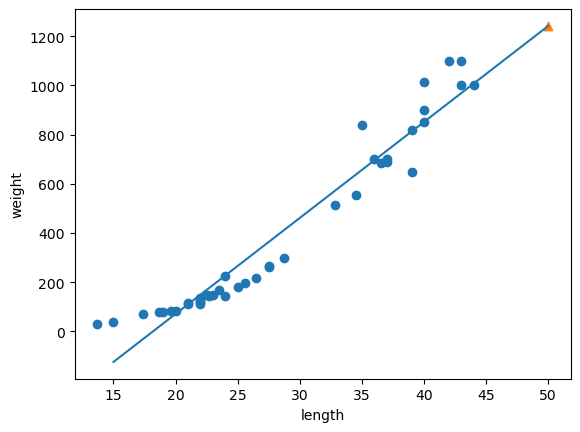

In [36]:
import matplotlib.pyplot as plt 
plt.scatter(train_input, train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_ +lr.intercept_])
plt.scatter(50,1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [37]:
print(lr.score(train_input,train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.8247503123313559


In [ ]:
# 다항회귀

In [38]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [41]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [42]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


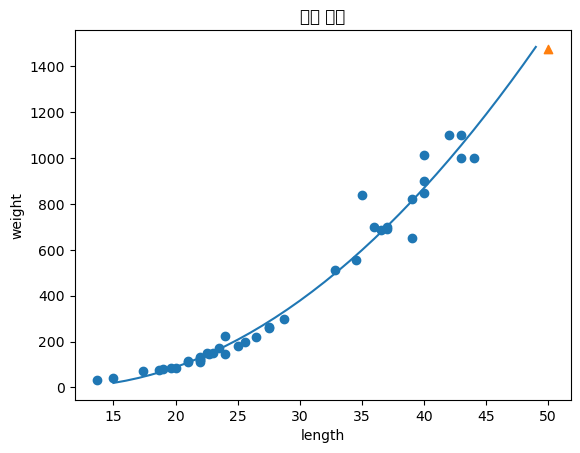

In [44]:
point = np.arange(15,50)

import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.56*point +116.05)
plt.scatter(50,1473.98, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('다항 회귀')
plt.show()

In [45]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


In [ ]:
# ** 키워드 핵심 **

# ** 선형 회귀 : 특성과 타깃 사이의 관계를 가장 잘 나타내는 선형 방정식
#     특성이 하나면 직선 방정식

#     - 선형 회귀가 찾은 특성과 타깃의 관계는 
#      선형 방정식의 계수 또는 가중치(기울기 , 절편)에 저장됨.

# ** 모델 파라미터 : 선형회귀가 찾은 가중치 처럼 머신 모델이 특성에서 학습한 파라미터

# ** 다항 회귀 : 다항식을 사용하여 특성과 타깃 사이의 관계를 나타냄
#   이 함수는 비선형일 수 있지만 선형 회기로 표현할 수 있음

In [ ]:
# ** 핵심 패키지 함수 **

# ** scikit-learn
# * LinearRegression은 사이킷런의 선형 회귀 클래스
#   fit_intercept 매개변수를 False로 지정하면 절편을 학습하지 않음.
#   매개변수의 기본값은 True

#   학습된 모델의 coef_ 속성은 특성에 대한 계수를 포함한 배열
#   이 배열의 크기는 특성의 개수와 같음.
#   intercept_ 속성에는 절편이 저장되어 있음.

확인 문제

In [ ]:
1. 선형 회귀 모델이 찾은 방정식의 계수를 무엇이라고 하는가

1. 회귀 파라미터
2. 선형 파라미터
3. 학습 파라미터
4. 모델 파라미터 <<<<


@@ 모델 기반 학습에서 모델이 찾은 정보는 모델 파라미터에 저장됨.
  선형 회귀에서 방정식의 계수가 여기에 해당됨

  

In [ ]:
2. 사이킷런에서 다항회귀 모델을 훈련할 수 있는 클래스

LinearRegression